In [93]:
%%bash
# This notebook is organized as a slide show, 
# run this cell to display the interactive slides
jupyter nbconvert 2D_Proc.ipynb --to slides
mv 2D_Proc.slides.html files/
cd files; python -m nbconvert.postprocessors.serve 2D_Proc.slides.html

Process is interrupted.


In [30]:
%pylab inline
plt.style.use('seaborn-talk')
mpl.rcParams['image.cmap']= u'coolwarm'
#print(plt.style.available)

Populating the interactive namespace from numpy and matplotlib


# Advanced Processing

### 1) 2D processing
### 2) Non Uniform Sampling
### 3) Compressed sensing

# Principle of 2D acquisition
![](files/schema_2D.png)
<span style='font-size:6pt;line-height:3px;'>*from E Biophys J.* (2019) 48:213–229 doi: 10.1007/s00249-019-01348-5
Two‐dimensional mass spectrometry: new perspectives for tandem mass spectrometry<BR>
M.A.van Agthoven, Y.P.Y.Lam, P.B.O’Connor, C.Rolando, M‐A.Delsuc</span>

Just remark that

- $t_2$ is a classical transient acquisition - standard MS/MS spectrum
- $t_1$ is the first delay - modulates ion intensity for the fragmentation step

$\Rightarrow$ Much more in Peter's course tomorrow !


# Some theory on 2D / nD Data-Processing

## Standard 2D signal:
#### one line
$$
x_{t_1,t_2} = A \cos(\omega_1 t_1) \cos(\omega_2 t_2)
$$
#### more general case:
$k$ lines, phase, 

$$
x_{t_1,t_2} = \sum_k A_k \cos(\omega_{k_1} t_1 + \phi_1) \cos(\omega_{k_2} t_2 +\phi_2)
$$

#### remark
signal is separable : $f(t_1) \times g(t_2)$ $\Rightarrow$ we can compute sequentially FT in $t_2$ and then in $t_1$

## Real signal
FTICR Broad-Band detection can measure only *real* signals $\Rightarrow$ real acquisition

#### Real acquisition:

$$
x_{t_1,t_2} = \sum_k A_k \cos(\omega_{k_1} t_1 + \phi_1) \cos(\omega_{k_2} t_2 +\phi_2)
$$


## Complex signal
NMR and FTICR *heterodyne* detection can measure separatly *real* and *imaginary* signals $\Rightarrow$ complex acquisition

#### complex acquisition:

$$
x_{t_1,t_2} = \sum_k A_k \cos(\omega_{k_1} t_1 + \phi_1)
  \left ( \cos(\omega_{k_2} t_2 +\phi_2) + i \sin(\omega_{k_2} t_2 +\phi_2) \right )
$$
also
$$
x_{t_1,t_2} = \sum_k A_k \cos(\omega_{k_1} t_1 + \phi_1)
    \exp^{i (\omega_{k_2} t_2 +\phi_2) } 
$$

This Complex signal is implied in the Real acquisition, and can always be computed from the real signal.

*think of doing signal -RealFT-> cpx spectrum -InvFT-> cpx signal*

This is the **Analytical Signal**

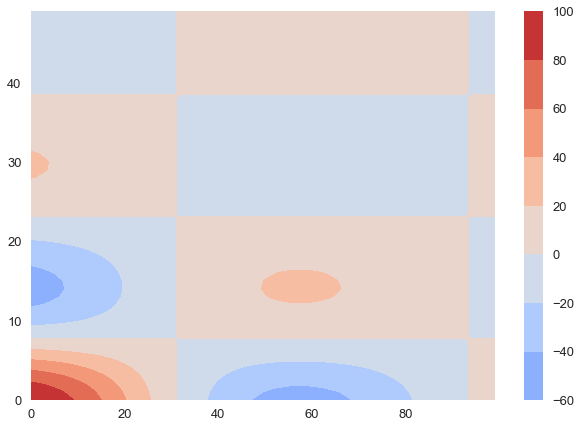

In [63]:
N1 = 50; N2 = 100  # This very small size allows to clearly see the effects - but introduces distortions
t_1 = linspace(0,10,N1)
t_2 = linspace(0,5,N2)
x = ones((N1,N2))
x = 10*cos(t_2)*exp(-t_2/4)*x
x = (10*cos(t_1)*exp(-t_1/4)*x.T).T
contourf(x, vmin=-100, vmax=100)
colorbar();

Text(0.5,1,'First column')

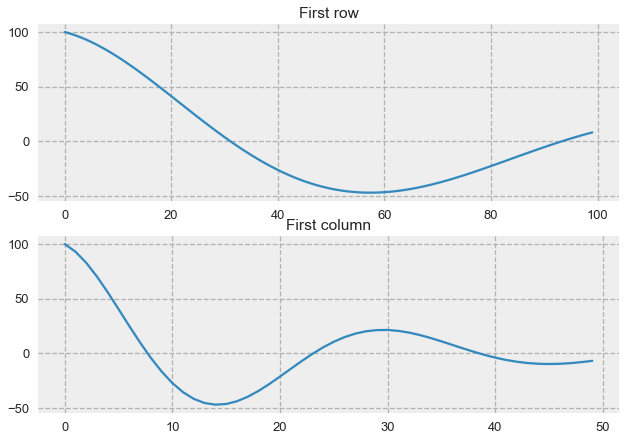

In [69]:
fig, (ax1,ax2) = subplots(nrows=2)
ax1.plot(x[0,:]); ax1.set_title('First row')
ax2.plot(x[:,0]); ax2.set_title('First column');

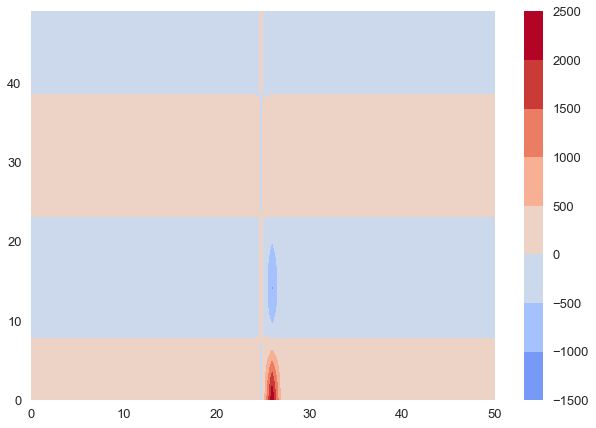

In [72]:
X_1 = rfft(x, axis=1)  # notice the rfft 
X_1 = fftshift(X_1.real,axes=1)

contourf(X_1, vmin=-2000, vmax=2000)
colorbar();

(20, 35)

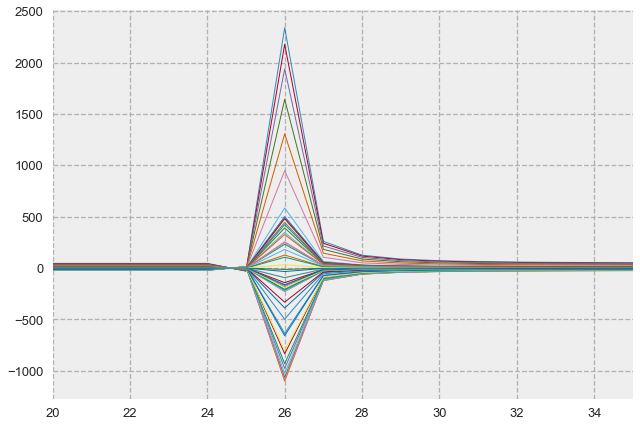

In [87]:
plot(X_1.T.real,linewidth=1);
xlim(xmin=20,xmax=35)

The shape here is a Lorentzian line-shape, due to the exponential decay added to the line
$$
L(\omega) = \frac {A} {1 + \lambda (\omega - \omega_o)^2}
$$
where $\omega_à$ is the line center, and $\lambda$ related to its width.

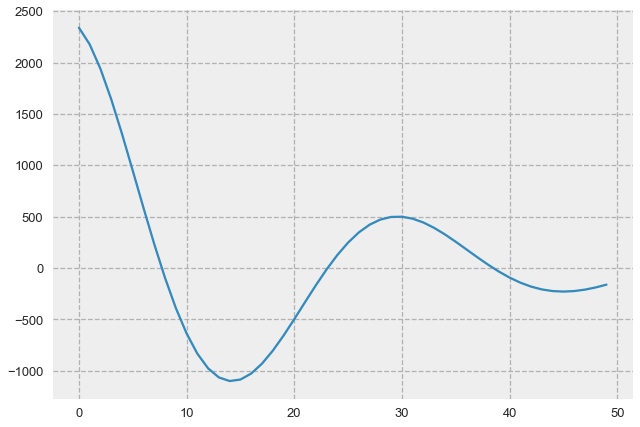

In [74]:
plot(X_1[:,26].real);

This is a **Amplitude Modulation** scheme

## Modulation type
We have seen **Amplitude modulation** scheme

There is also **Phase modulation** scheme
$$
x_{t_1,t_2} = \sum_k A_k     \exp^{i (\omega_{k_1} t_1 + \phi_1) } 
    \exp^{i (\omega_{k_2} t_2 +\phi_2) } 
$$
equivalent to:
$$
x_{t_1,t_2} = \sum_k A_k     \exp^{i \left ( \omega_{k_1} t_1 + \omega_{k_2} t_2 + \phi_1+ \phi_2 \right ) } 
$$

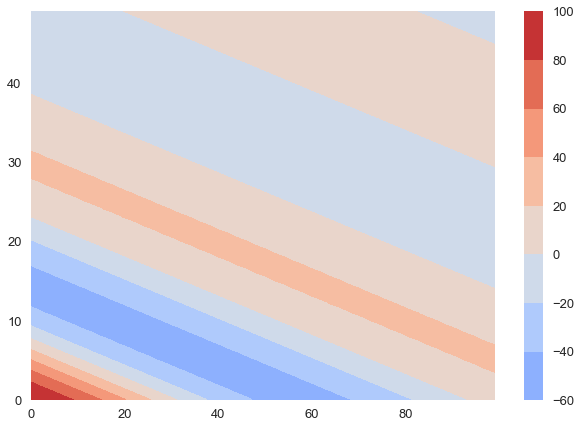

In [75]:
xp = ones((N1,N2))
xp = 10*exp(1j*t_2)*exp(-t_2/4)*xp
xp = (10*exp(1j*t_1)*exp(-t_1/4)*xp.T).T
contourf(xp.real, vmin=-100, vmax=100)
colorbar();

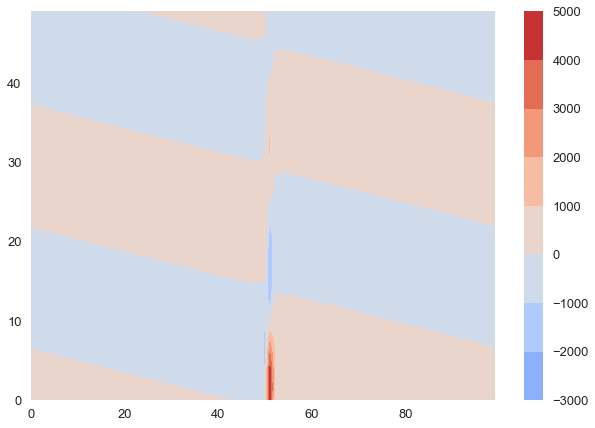

In [76]:
Xp_1 = fft.fft(xp,axis=1)  # notice the fft 
Xp_1 = fftshift(Xp_1,axes=1)
contourf(Xp_1.real, vmin=-5000, vmax=5000)
colorbar();

(40, 60)

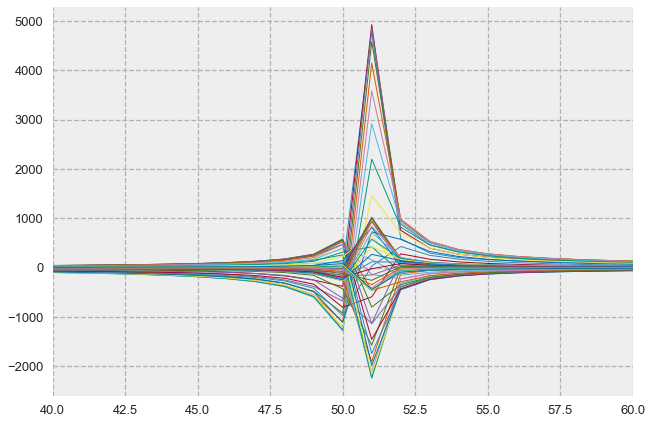

In [89]:
#plot(Xp_1[40,:])
plot(Xp_1.T.real, linewidth=1);
xlim(xmin=40,xmax=60)

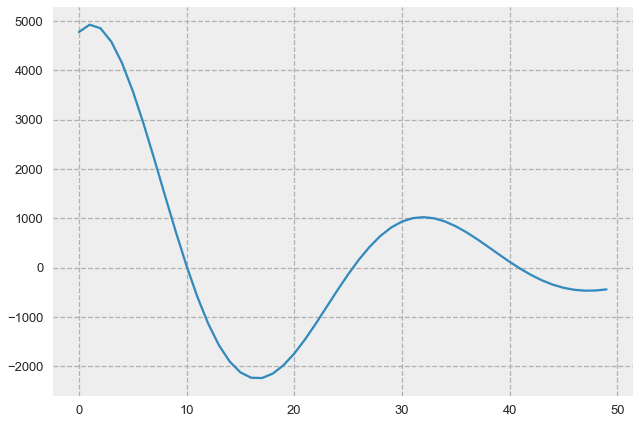

In [78]:
p = plot(Xp_1[:,51].real);

## Both modulation do not produce the same spectra
One can see that amplitude modulated surface produces more compact lines in horizontal - $F_2$ domain.

How is it in 2D FT ?

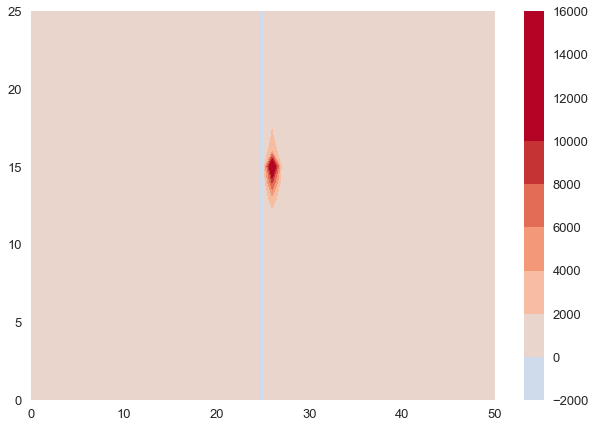

In [79]:
X_12 = fft.rfft(X_1,axis=0)  # notice the fft 
X_12 = fftshift(X_12,axes=0)
contourf(X_12.real, vmin=-10000, vmax=10000)
colorbar();

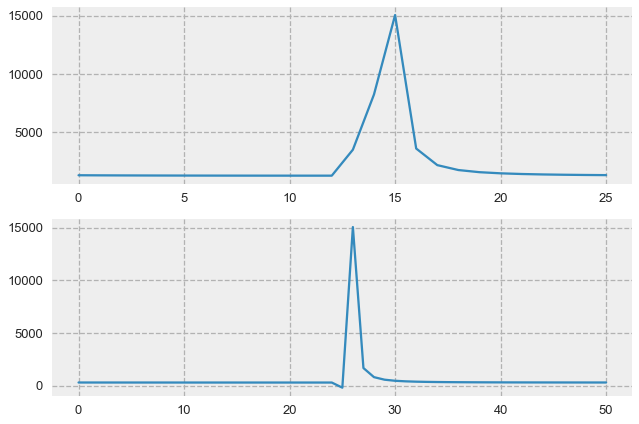

In [80]:
subplot(211)
plot(X_12[:,26].real)
subplot(212)
plot(X_12[15,:].real);

this shape is pure *absorption* shape along both axes

It is naturally called **Absorption** lineshape.


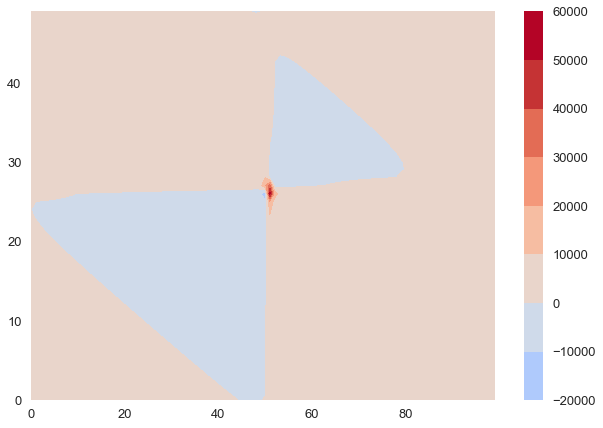

In [81]:
Xp_12 = fft.fft(Xp_1,axis=0)  # notice the fft 
Xp_12 = fftshift(Xp_12,axes=0)
contourf(Xp_12.real, vmin=-50000, vmax=50000)
colorbar();

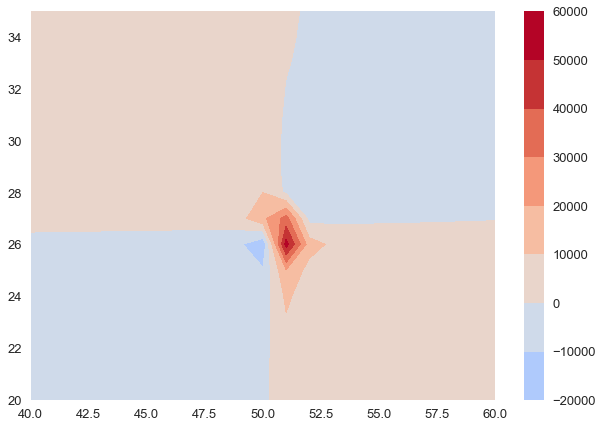

In [83]:
contourf(Xp_12.real, vmin=-50000, vmax=50000)
xlim(xmin=40,xmax=60)
ylim(ymin=20,ymax=35)
colorbar();

/Users/mad/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


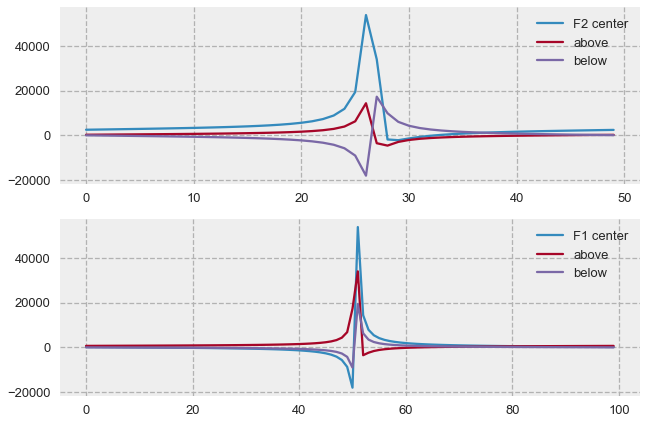

In [54]:
subplot(211)
plot(Xp_12[:,51], label="F2 center")
plot(Xp_12[:,52], label="above")
plot(Xp_12[:,50], label="below")
legend()
subplot(212)
plot(Xp_12[26,:], label="F1 center")
plot(Xp_12[27,:], label="above")
plot(Xp_12[25,:], label="below")
legend();

this shape is a mixture of *absorption* and *dispertion* lineshape along both axes.

It is called a **Phase-twist** lineshape.

## The text-book 2D Fourier transform
is the phase modulation scheme

It is used

- for image processing
- in crystallography (in 3D rather than 2D !)

## 2D FTICR-MS 
produces amplitude modulated experiment


## generalisation
**Amplitude** modulation can be further generalized.
as this modulation is produced by a pulse sequence, it might be possible to generate $\sin$ modulation as well as $\cos$ modulation, simply by shifting the phase of the pulses around $t_1$
$$
  x_c = \cos(\omega_1 t_1) \exp(i \omega_2 t_2) \\
  x_s = \sin(\omega_1 t_1) \exp(i \omega_2 t_2) \\
$$

if we do
$$
x = x_c + i x_s
$$
we fall back on **Phase modulation** and loose nice absorption lineshape.

Can we do better ?

## Hyper complex numbers
What if we can separate complex numbers generated by the acquisition (along $t_2$) and complex numbers generated by the $\cos$ and $\sin$ modulation

This would be equivalent to using two different square root of $-1$.
Let's call them $i$ and $j$
$$
 i^2 = -1 \quad j^2 = -1
$$
then
$$
  x_c = \cos(\omega_1 t_1) \exp(i \omega_2 t_2) \\
  x_s = \sin(\omega_1 t_1) \exp(i \omega_2 t_2) \\
$$
and
$$
x = x_c + j x_s
$$
so $i$ is associated to acquisition axis and $j$ is associated to incremented axis.

## Hyper complex numbers
Then we have to define the following rules :
$$
i^2 = -1 \quad j^2 = -1 \\
ij = ji = k \quad k^2 = 1 \\
ik = ki = -j \quad ik = kj = -i
$$

and we call $z$:
$$
z = a + ib +jc + kd
$$
a hypercomplex number (Delsuc,(1988) *J.Magn.Reson.* **77** pp119–24)

From this we have, for $z_1$ and $z_2$ two different hypercomplex numbers;
$$
z_1 + z_2 = a_1 + a2 + i(b_1+b_2) + j(c_1+c_2) + k(d_1+d_2)
$$
and multiplication alike

$$
z_1 \times z_2 = a_1 a2 - b_1 b_2 - c_1 c_2 + d_1 d_2 \\
 + i (a_1 b_2 + b_1 a_2 - c_1 d_2 - d_1 c_2) \\
 + j (a_1 c_2 + c_1 a_2 - b_1 d_2 - d_1 b_2) \\
 + k (a_1 d_2 d_1 a_2 + b_1 c_2 + c_1 b_2)
$$

With these definitions, both addition and multiplication are communtative and associative.

Note also that this is completely different from **quaternions** where
$$
i^2 = -1 \quad j^2 = -1 \quad ij = k \quad k^2 = -1
$$
and multiplication is not commutative.

## Clifford Algebra
These hypercomplex numbers can be generalized to 3D, with $2^3$ elements, and to nD with $2^n$ terms.

They form form algebra which are aspecial form of generalized complex numbers called *Clifford Algebra* (check https://en.wikipedia.org/wiki/Clifford_algebra ) which also cover complexes, quaternions and many other forms.

*Clifford Algebra* have many application in physics, and have very natural links with multidimensionnnal spectroscopy.

# Implementing hypercomplex Fourier Transform.
The classical way is to keep separated the real and imaginary part of each axis, eventually keeping the classical one as complex numbers.

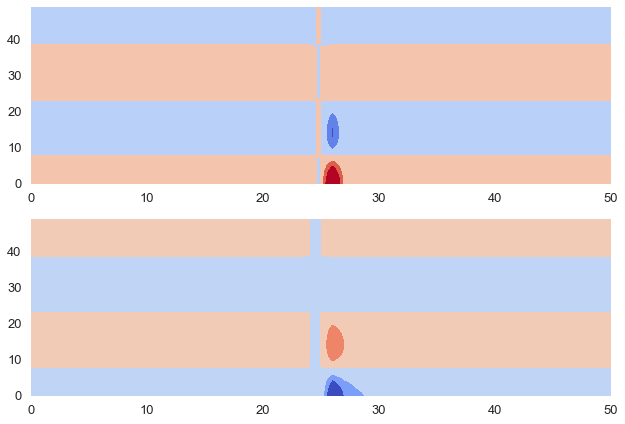

In [90]:
X_1 = fftshift(rfft(x,axis=1),axes=1)
Xr_1 = X_1.real
Xi_1 = X_1.imag
subplot(211)
contourf(Xr_1, vmin=-1000, vmax=1000)
subplot(212)
contourf(Xi_1, vmin=-1000, vmax=1000);

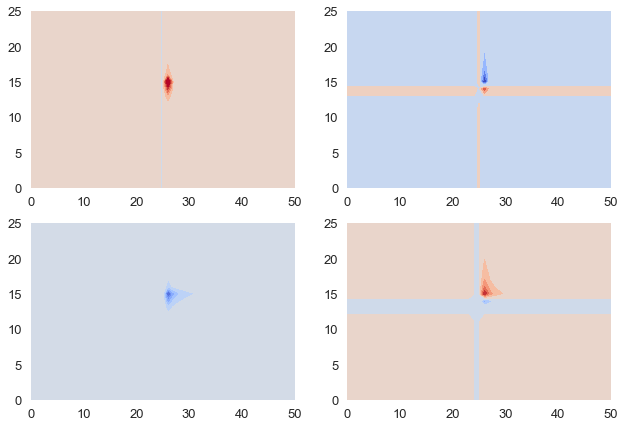

In [92]:
Xr_12 = fftshift(rfft(Xr_1,axis=0),axes=0)
Xrr = Xr_12.real; Xri = Xr_12.imag
Xi_12 = fftshift(rfft(Xi_1,axis=0),axes=0)
Xir = Xi_12.real; Xii = Xi_12.imag
subplot(221);contourf(Xrr, vmin=-10000, vmax=10000)
subplot(222);contourf(Xri, vmin=-10000, vmax=10000)
subplot(223);contourf(Xir, vmin=-10000, vmax=10000)
subplot(224);contourf(Xii, vmin=-10000, vmax=10000);

This is called the *four quadrant* approach, and they are usually noted **RR RI IR** and **II**

With this approach, one can define independent phases in both axes,
and some hypercomplex numbers can be noted (*invertible ones*):
$$
z = R \exp(i \theta) \exp(j \psi)\\
z = R \left [ \cos(\theta) \cos(\psi) + i \cos(\theta) \sin(\psi) +j \sin(\theta) \cos(\psi) + k \sin(\theta) \sin(\psi) \right ]
$$
with very natural multiplication rules.

The **SPIKE** software that we will use later implements this four quadrant approach in a different manner, by a clever organization of the data along each axis.